In [1]:
from sympy import *

# Compute the payoff matrix

In [2]:
# payoff structure
R, S, T, P = symbols('R, S, T, P', real = True)

# payoff matrix
alpha_11, alpha_12, alpha_13 = symbols('alpha_11, alpha_12, alpha_13', real = True)
alpha_21, alpha_22, alpha_23 = symbols('alpha_11, alpha_12, alpha_13', real = True)
alpha_31, alpha_32, alpha_33 = symbols('alpha_11, alpha_12, alpha_13', real = True)

# selection strength
beta = symbols('beta', real= True)

# population size
N = symbols('N', integer = True, positive = True)

# network degree
k = symbols('k', integer = True, positive = True)

# Extortionate ZD
phi, chi = symbols('phi, chi',real = True) # parameters for the linear eguation
payments = [(R, 3),(S, 0),(T, 5),(P, 1)] # payments of the conventional IPD
init_printing(use_unicode = True) # for a good presentation of mathematics

In [3]:
def interaction(payments = False, chi_sub = False):
    '''
    payments: payoff structure [R, S, T, P]
    chi_sub: extortion factor
    '''
    
    # strategies
    p_1, p_2, p_3, p_4 = symbols('p_1, p_2, p_3, p_4', real = True) # my probabilities to cooperate
    q_1, q_2, q_3, q_4 = symbols('q_1, q_2, q_3, q_4', real = True) # my opponent's probabilities to cooperate
    
    # ALLC
    Cooperator_p = [(p_1, 1), (p_2, 1), (p_3, 1), (p_4, 1)]
    Cooperator_q = [(q_1, 1), (q_2, 1), (q_3, 1), (q_4, 1)]
    
    # unbending AI agent
    PSOGamblerMem1_p = [(p_1, 1.0), (p_2, 0.52173487), (p_3, 0), (p_4, 0.12050939)]
    PSOGamblerMem1_q = [(q_1, 1.0), (q_2, 0.52173487), (q_3, 0), (q_4, 0.12050939)]
    
    # extortionate ZD strategy
    r_1 = 1 - phi*(R - P)*(chi - 1)
    r_2 = 1 - phi*((T - P)*chi + (P - S))
    r_3 = phi*((P - S)*chi+(T - P))
    r_4 = 0
    
    # matrix for the determinant D(p, q, 1)
    A_1 = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, 1],
                  [p_2*q_3, -1 + p_2, q_3, 1],
                  [p_3*q_2, p_3, -1 + q_2, 1],
                  [p_4*q_4, p_4, q_4, 1]])
    
    # matrix for the determinant D(p, q, S_X)
    A_X = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, R],
                  [p_2*q_3, -1 + p_2, q_3, S],
                  [p_3*q_2, p_3, -1 + q_2, T],
                  [p_4*q_4, p_4, q_4, P]])
    
    # the payoff
    s_X = A_X.det()/A_1.det()
    
    if chi_sub:
        r_1 = r_1.subs({phi: 1/((T - S)*(chi_sub + 1))})
        r_2 = r_2.subs({phi: 1/((T - S)*(chi_sub + 1))})
        r_3 = r_3.subs({phi: 1/((T - S)*(chi_sub + 1))})
        r_1, r_2, r_3 = r_1.subs({chi: chi_sub}), r_2.subs({chi: chi_sub}), r_3.subs({chi: chi_sub})
    
    if payments:
        r_1, r_2, r_3 = r_1.subs(payments), r_2.subs(payments), r_3.subs(payments)
        s_X = s_X.subs(payments)
    
    extortionate_ZD_p = [(p_1, r_1), (p_2, r_2), (p_3, r_3), (p_4, r_4)]
    extortionate_ZD_q = [(q_1, r_1), (q_2, r_2), (q_3, r_3), (q_4, r_4)]
    
    alpha_11_sub = factor(s_X.subs(Cooperator_p + Cooperator_q))
    alpha_12_sub = factor(s_X.subs(Cooperator_p + extortionate_ZD_q))
    alpha_13_sub = factor(s_X.subs(Cooperator_p + PSOGamblerMem1_q))
    alpha_21_sub = factor(s_X.subs(extortionate_ZD_p + Cooperator_q))
    alpha_22_sub = factor(s_X.subs(extortionate_ZD_p + extortionate_ZD_q))
    alpha_23_sub = factor(factor(s_X.subs(extortionate_ZD_p + [(q_1, 1), (q_3, 0)])).subs(PSOGamblerMem1_q))
    alpha_31_sub = s_X.subs(Cooperator_q).subs(PSOGamblerMem1_p)
    alpha_32_sub = factor(factor(s_X.subs(extortionate_ZD_q + [(p_1, 1), (p_3, 0)])).subs(PSOGamblerMem1_p))
    alpha_33_sub = factor(s_X.subs(PSOGamblerMem1_p + PSOGamblerMem1_q))

    return alpha_11_sub, alpha_12_sub, alpha_13_sub, alpha_21_sub, alpha_22_sub, alpha_23_sub, alpha_31_sub, alpha_32_sub, alpha_33_sub


In [4]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction()

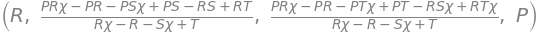

In [5]:
alpha_11, alpha_12, alpha_21, alpha_22

In [6]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments)

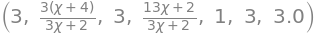

In [7]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_31, alpha_33

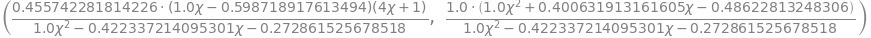

In [8]:
alpha_23, alpha_32

# Compute the fixation probabilities

In [9]:
# fixation probabilities
rho_12, rho_13, rho_21, rho_23, rho_31, rho_32 = symbols('rho_12, rho_13, rho_21, rho_23, rho_31, rho_32', real = True)

In [10]:
alpha_11 = 3
alpha_13 = 3
alpha_31 = 3
alpha_33 = 3
alpha_22 = 1

rho_21 = 1/N + beta*(((k+1)**2*3 + (2*k**2-2*k-1)*alpha_12 - (k**2-k+1)*alpha_21 - (2*k-1)*(k+1)*1)/(6*(k-1)))
rho_12 = 1/N + beta*(((k+1)**2*1 + (2*k**2-2*k-1)*alpha_21 - (k**2-k+1)*alpha_12 - (2*k-1)*(k+1)*3)/(6*(k-1)))

rho_31 = 1/N + beta*(((k+1)**2*alpha_11 + (2*k**2-2*k-1)*alpha_13 - (k**2-k+1)*alpha_31 - (2*k-1)*(k+1)*alpha_33)/(6*(k-1)))
rho_13 = 1/N + beta*(((k+1)**2*alpha_33 + (2*k**2-2*k-1)*alpha_31 - (k**2-k+1)*alpha_13 - (2*k-1)*(k+1)*alpha_11)/(6*(k-1)))

rho_32 = 1/N + beta*(((k+1)**2*alpha_22 + (2*k**2-2*k-1)*alpha_23 - (k**2-k+1)*alpha_32 - (2*k-1)*(k+1)*alpha_33)/(6*(k-1)))
rho_23 = 1/N + beta*(((k+1)**2*alpha_33 + (2*k**2-2*k-1)*alpha_32 - (k**2-k+1)*alpha_23 - (2*k-1)*(k+1)*alpha_22)/(6*(k-1)))

rho_21_sub = factor(rho_21)
rho_12_sub = factor(rho_12)
rho_31_sub = factor(rho_31)
rho_13_sub = factor(rho_13)
rho_32_sub = factor(rho_32)
rho_23_sub = factor(rho_23)

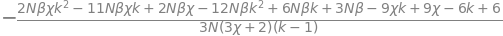

In [11]:
rho_21_sub

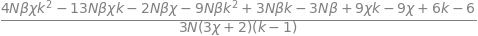

In [12]:
rho_12_sub

In [13]:
rho_31_sub

In [14]:
rho_13_sub

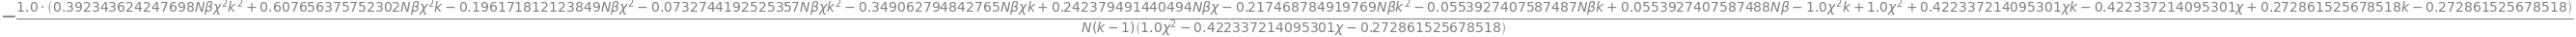

In [15]:
rho_32_sub

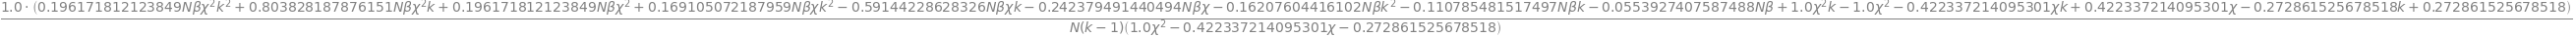

In [16]:
rho_23_sub

# Compute the long-term abundances

In [17]:
# Variables help us to simplify
gamma_1, gamma_2, gamma_3 = symbols('gamma_1, gamma_2, gamma_3', real = True)

# long-term abundances for 2-strategy
lambda_11, lambda_22 = symbols('lambda_11, lambda_22', real = True)

# long-term abundances for 3-strategy
lambda_1, lambda_2, lambda_3 = symbols('lambda_1, lambda_2, lambda_3', real = True)

In [18]:
gamma_1 = rho_21*rho_31 + rho_21*rho_32 + rho_31*rho_23
gamma_2 = rho_31*rho_12 + rho_12*rho_32 + rho_32*rho_13
gamma_3 = rho_21*rho_13 + rho_12*rho_23 + rho_13*rho_23

lambda_1 = gamma_1/(gamma_1 + gamma_2 + gamma_3)
lambda_2 = gamma_2/(gamma_1 + gamma_2 + gamma_3)
lambda_3 = gamma_3/(gamma_1 + gamma_2 + gamma_3)
lambda_1_sub = factor(lambda_1)
lambda_2_sub = factor(lambda_2)
lambda_3_sub = factor(lambda_3)

lambda_11 = rho_21/(rho_12 + rho_21)
lambda_22 = rho_12/(rho_12 + rho_21)
lambda_11_sub = factor(lambda_11)
lambda_22_sub = factor(lambda_22)

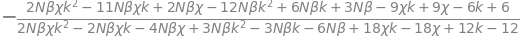

In [19]:
lambda_11_sub

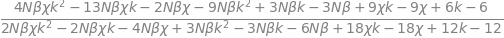

In [20]:
lambda_22_sub

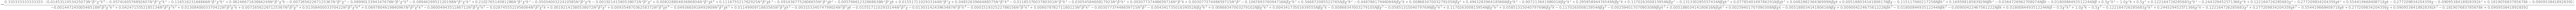

In [21]:
lambda_1_sub

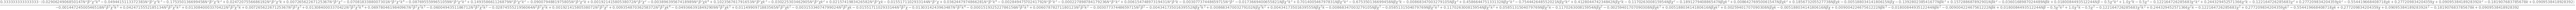

In [22]:
lambda_2_sub

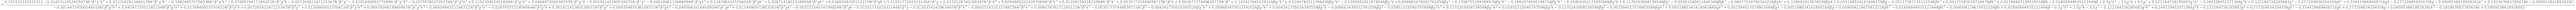

In [23]:
lambda_3_sub

# Simplify the fixation probabilities for $N = 100$, $\beta = 0.001$, $k = 4$

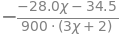

In [24]:
rho_21_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

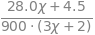

In [25]:
rho_12_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

In [26]:
rho_31_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

In [27]:
rho_13_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

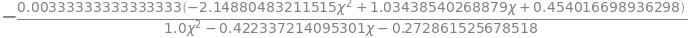

In [28]:
rho_32_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

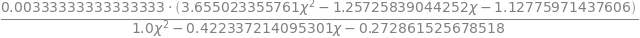

In [29]:
rho_23_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

# Simplify the long-term abundances for $N = 100$, $\beta = 0.001$, $k = 4$

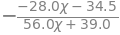

In [30]:
lambda_11_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

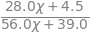

In [31]:
lambda_22_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

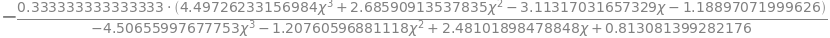

In [32]:
lambda_1_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

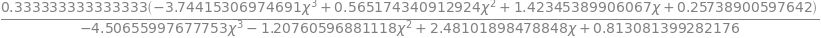

In [33]:
lambda_2_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

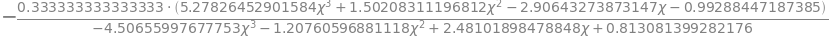

In [34]:
lambda_3_sub.subs(N, 100).subs(k, 4).subs(beta, 0.001)

# Plot the function images of long-term abundances

In [2]:
import matplotlib.pyplot as plt
import numpy as np

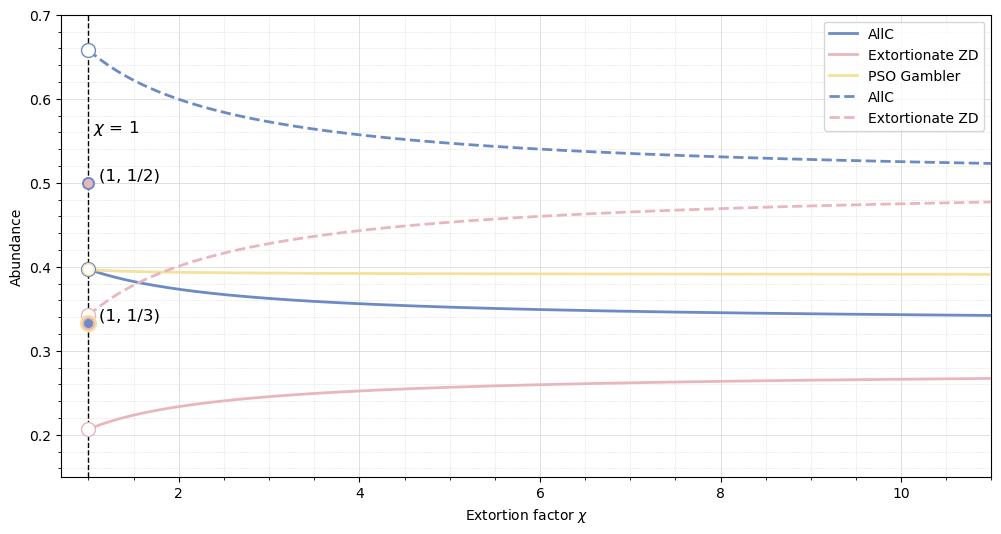

In [4]:
# domain of definition
x = np.linspace(1, 20, 100000)

# size of the output figure
plt.figure(figsize=(12, 6))

# long-term abundances(chi > 1)
# lambda_1
y1 = -(4.49726233156984*x**3 + 2.68590913537835*x**2 - 3.11317031657329*x - 1.18897071999626)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
# lambda_2
y2 = (-3.74415306974691*x**3 + 0.565174340912924*x**2 + 1.42345389906067*x + 0.25738900597642)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
# lambda_3
y3 = -(5.27826452901584*x**3 + 1.50208311196812*x**2 - 2.90643273873147*x - 0.99288447187385)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
# lambda_11
y4 = (28*x + 34.5)/(56*x + 39)
# lambda_22
y5 = (28*x + 4.5)/(56*x + 39)

# long-term abundances for 3-strategy(chi = 1)
x0 = 1
y0 = 1/3
plt.scatter(x0, y0, s = 130, color = '#F3E19C', zorder=13)
plt.scatter(x0, y0, s = 70, color = '#E9B6BE', zorder=14)
plt.scatter(x0, y0, s = 30, color = '#6D8BC3', zorder=15)

# long-term abundances for 2-strategy(chi = 1)
x_0 = 1
y_0 = 1/2
plt.scatter(x_0, y_0, s = 70, color = '#6D8BC3', zorder=16)
plt.scatter(x_0, y_0, s = 30, color = '#E9B6BE', zorder=17)

plt.plot(x, y1, color='#6D8BC3', label = 'AllC', linewidth=2, zorder=3)
plt.plot(x, y2, color='#E9B6BE', label = 'Extortionate ZD', linewidth=2, zorder=4)
plt.plot(x, y3, color='#F3E19C', label = 'PSO Gambler', linewidth=2, zorder=5)
plt.plot(x, y4, color='#6D8BC3', label = 'AllC', linestyle='--', linewidth=2, zorder=6)
plt.plot(x, y5, color='#E9B6BE', label = 'Extortionate ZD', linestyle='--', linewidth=2, zorder=7)

# the function expressions are not available at chi = 1
# y1(x=1) = 0.39682539682539736
# y2(x=1) = 0.20634920634920711
# y3(x=1) = 0.39682539682539747
# y4(x=1) = 0.657894736842105
# y5(x=1) = 0.342105263157894
plt.scatter(1, 0.39682539682539736, s=100, facecolors='w', edgecolors='#6D8BC3', zorder=8)
plt.scatter(1, 0.20634920634920711, s=100, facecolors='w', edgecolors='#E9B6BE', zorder=9)
plt.scatter(1, 0.39682539682539747, s=70, facecolors='w', edgecolors='#F3E19C', zorder=10)
plt.scatter(1, 0.657894736842105, s=100, facecolors='w', edgecolors='#6D8BC3', zorder=11)
plt.scatter(1, 0.342105263157894, s=100, facecolors='w', edgecolors='#E9B6BE', zorder=12)

plt.xlim(0.7, 11)
plt.ylim(0.15, 0.7)

plt.xlabel(r'Extortion factor $\chi$')
plt.ylabel('Abundance')

# chi = 1 is unavailable
plt.axvline(x = 1, color = 'black', linestyle='--',linewidth=1)

plt.text(1.45, y0,'(1, 1/3)', ha='center', va='bottom', fontsize=12)
plt.text(1.45, y_0,'(1, 1/2)', ha='center', va='bottom', fontsize=12)
plt.text(1.05, 0.56,r'$\chi$ = 1', fontsize=12)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', zorder=1)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey', zorder=2)

plt.tick_params(axis='both', which='major', labelsize=10)


plt.legend()

# save the figure
#plt.savefig('Long-term Abundances of an Evolutionary Game.svg',format='svg')
#plt.savefig('Long-term Abundances of an Evolutionary Game.png',format='png',dpi = 900)

plt.show()

# Plot the function images of fixation probabilities

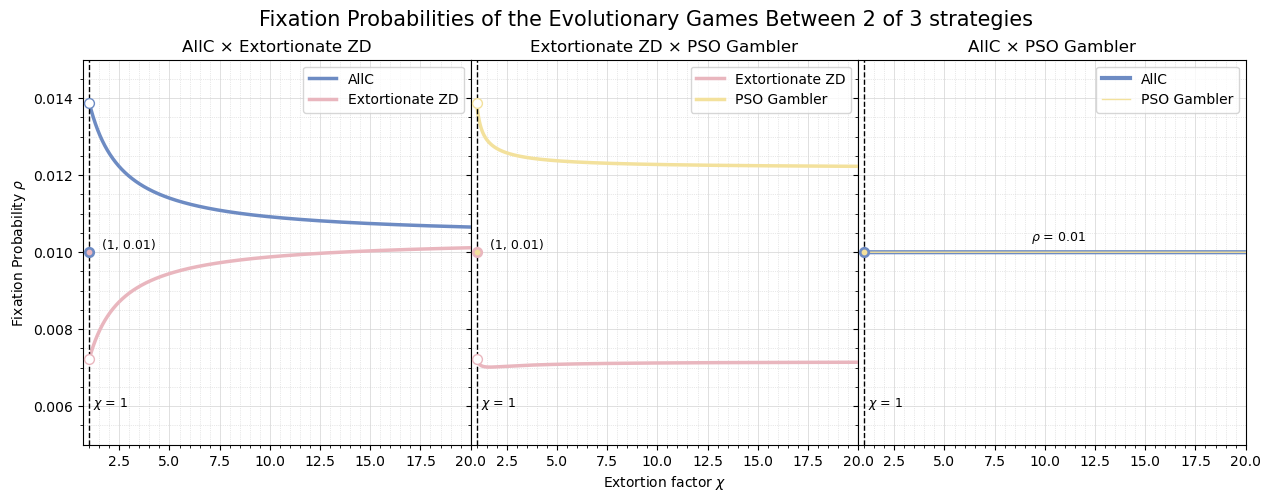

In [5]:
# size of the output figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


######################## Figure_1: AllC × Extortionate ZD ########################
# domain of definition
x = np.linspace(1, 20, 100000)

# fixation probabilities(chi > 1)
# rho_21
y1 = (28*x + 34.5)/(900*(3*x + 2))
# rho_12
y2 = (28*x + 4.5)/(900*(3*x + 2))

axs[0].plot(x, y1, color='#6D8BC3', label='AllC', linewidth=2.5, zorder=3)
axs[0].plot(x, y2, color='#E9B6BE', label='Extortionate ZD', linewidth=2.5, zorder=4)

# the function expressions are not available at chi = 1
# y1(x=1) = 0.013888888888888888
# y2(x=1) = 0.007222222222222222
axs[0].scatter(1, 0.013888888888888888, s=50, facecolors='w', edgecolors='#6D8BC3', zorder=6)
axs[0].scatter(1, 0.007222222222222222, s=50, facecolors='w', edgecolors='#E9B6BE', zorder=7)

# fixation probabilities(chi = 1)
axs[0].scatter(1, 0.01, s = 50, color = '#6D8BC3', zorder=8)
axs[0].scatter(1, 0.01, s = 10, color = '#E9B6BE', zorder=9)

axs[0].set_xlim(0.7, 20)
axs[0].set_ylim(0.005, 0.015)

axs[0].set_title('AllC × Extortionate ZD')
axs[0].legend()
axs[0].set_ylabel(r'Fixation Probability $\rho$')

# chi = 1 is unavailable
axs[0].axvline(x = 1, color = 'black', linestyle='--',linewidth=1, zorder=5)

axs[0].text(3, 0.01,'(1, 0.01)', ha='center', va='bottom', fontsize=9)
axs[0].text(1.2, 0.006,r'$\chi$ = 1', fontsize=9)

axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', zorder=1)
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey', zorder=2)

axs[0].tick_params(axis='both', which='major', labelsize=10)
##################################################################################


################### Figure_2: Extortionate ZD × PSO Gambler ######################
# domain of definition
x = np.linspace(1, 20, 100000)

# fixation probabilities(chi > 1)
# rho_32
y1 = (2.14880483211515*x**2 - 1.03438540268879*x - 0.454016698936298)/(300*(x**2 - 0.422337214095301*x - 0.272861525678518))
# rho_23
y2 = (3.655023355761*x**2 - 1.25725839044252*x - 1.12775971437606)/(300*(x**2 - 0.422337214095301*x - 0.272861525678518))

axs[1].plot(x, y1, color='#E9B6BE', label='Extortionate ZD', linewidth=2.5, zorder=3)
axs[1].plot(x, y2, color='#F3E19C', label='PSO Gambler', linewidth=2.5, zorder=4)

# the function expressions are not available at chi = 1
# y1(x=1) = 0.007222222222222222
# y2(x=1) = 0.013888888888888888
axs[1].scatter(1, 0.007222222222222222, s=50, facecolors='w', edgecolors='#E9B6BE', zorder=6)
axs[1].scatter(1, 0.013888888888888888, s=50, facecolors='w', edgecolors='#F3E19C', zorder=7)

# fixation probabilities(chi = 1)
axs[1].scatter(1, 0.01, s = 50, color = '#E9B6BE', zorder=8)
axs[1].scatter(1, 0.01, s = 10, color = '#F3E19C', zorder=9)

axs[1].set_xlim(0.7, 20)
axs[1].set_ylim(0.005, 0.015)

axs[1].set_title('Extortionate ZD × PSO Gambler')
axs[1].legend()
axs[1].set_xlabel(r'Extortion factor $\chi$')
axs[1].set_yticklabels([])

# chi = 1 is unavailable
axs[1].axvline(x = 1, color = 'black', linestyle='--',linewidth=1, zorder=5)

axs[1].text(3, 0.01,'(1, 0.01)', ha='center', va='bottom', fontsize=9)
axs[1].text(1.2, 0.006,r'$\chi$ = 1', fontsize=9)

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', zorder=1)
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey', zorder=2)

axs[1].tick_params(axis='both', which='major', labelsize=10)
##################################################################################


######################### Figure_3: AllC × PSO Gambler ##########################
# domain of definition
x = np.linspace(1, 20, 100000)

# fixation probabilities(chi > 1)
# rho_31
y1 = (x-x+1)/100
# rho_13
y2 = (x-x+1)/100

axs[2].plot(x, y1, color='#6D8BC3', label='AllC', linewidth=3, zorder=3)
axs[2].plot(x, y2, color='#F3E19C', label='PSO Gambler', linewidth=1, zorder=4)

# fixation probabilities(chi = 1)
axs[2].scatter(1, 0.01, s = 50, color = '#6D8BC3', zorder=6)
axs[2].scatter(1, 0.01, s = 10, color = '#F3E19C', zorder=7)

axs[2].set_xlim(0.7, 20)
axs[2].set_ylim(0.005, 0.015)

axs[2].set_title('AllC × PSO Gambler')
axs[2].legend()
axs[2].set_yticklabels([])

axs[2].axvline(x = 1, color = 'black', linestyle='--',linewidth=1, zorder=5)

axs[2].text(9.3, 0.0103, r'$\rho$ = 0.01', fontsize=9)
axs[2].text(1.2, 0.006,r'$\chi$ = 1', fontsize=9)

axs[2].minorticks_on()
axs[2].grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', zorder=1)
axs[2].grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey', zorder=2)

axs[2].tick_params(axis='both', which='major', labelsize=10)
##################################################################################


fig.suptitle('Fixation Probabilities of the Evolutionary Games Between 2 of 3 strategies', fontsize=15)

plt.subplots_adjust(wspace=0)

# save the figure
#plt.savefig('Fixation Probabilities of the Evolutionary Games Between 2 of 3 strategies.svg',format='svg')
#plt.savefig('Fixation Probabilities of the Evolutionary Games Between 2 of 3 strategies.png',format='png',dpi = 900)

plt.show()


# Compute the payoff matrixes in different cases of $\chi$

### $\chi = 1.5$

In [38]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 1.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi = 2$

In [39]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 2)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi = 2.5$

In [40]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 2.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi = 3$

In [41]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 3)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=3.5$

In [42]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 3.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=4$

In [43]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 4)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=4.5$

In [44]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 4.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=5$

In [45]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=5.5$

In [46]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 5.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=6$

In [47]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 6)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=6.5$

In [48]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 6.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=7$

In [49]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 7)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=7.5$

In [50]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 7.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=8$

In [51]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 8)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=8.5$

In [52]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 8.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=9$

In [53]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 9)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=9.5$

In [54]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 9.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=10$

In [55]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 10)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### $\chi=10.5$

In [56]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 10.5)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33

### The special case $\chi=1$

In [57]:
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33 = interaction(payments, 1)
alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33